<a href="https://colab.research.google.com/github/ThatNinjaGuy/Machine-learning-A-Z-Course/blob/main/indian_elections2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

def extract_constituency_details(details_str):
    match = re.match(r"(\d+)\s*-\s*(.+)\s+\((.+)\)", details_str)
    if match:
        constituency_number = match.group(1)
        constituency_name = match.group(2)
        state_name = match.group(3)
        return constituency_number, constituency_name, state_name
    else:
        return None, None, None

def extract_party_details(soup):
    # Find constituency details
    constituency_header = soup.find('div', class_='page-title').find('h2').find('span')
    constituency_number, constituency_name, state_name = extract_constituency_details(constituency_header.text.strip())

    # Find the table. Extract the top 4 rows
    table = soup.find('table', class_='table table-striped table-bordered')
    rows = table.find_all('tr')[1:-2]
    return constituency_number, constituency_name, state_name, rows

def extract_html_content(url):
    # Make a request to the website. Check if the request was successful
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')
    return soup

def extract_constituency_voting_pattern(url, soup):
    constituency_number, constituency_name, state_name, rows = extract_party_details(soup)
    # Create a list to store the extracted data
    data = []

    # Loop through each row and extract the details
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        data.append([url, constituency_number, constituency_name, state_name] + cols)

    return data

def get_processed_data(data):
    # Convert the list to a DataFrame
    columns = ['Url', 'Constituency Number', 'Constituency Name', 'State Name', 'Index', 'Candidate', 'Party', 'Votes', 'Margin', 'Total Votes', 'Vote Share']
    df = pd.DataFrame(data, columns=columns)

    # Save to CSV (uncomment this line if you want to save the DataFrame to a CSV file)
    df.to_csv('election_results.csv', index=False)

    # Display the DataFrame
    return df

def get_urls_to_scrape():
    # Template URL
    template_url = 'https://results.eci.gov.in/PcResultGenJune2024/ConstituencywiseS'

    # Generate URLs for constituencies
    urls = [f'{template_url}{i}.htm' for i in range(101, 109)]

    urls.extend([f'{template_url}0{i}.htm' for i in range(11, 19)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(21, 22)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(31, 39)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(41, 49)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(51, 52)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(61, 69)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(71, 79)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(81, 84)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(110, 125)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(310, 314)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(410, 440)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(610, 626)])
    urls.extend([f'{template_url}0{i}.htm' for i in range(710, 710)])

    urls.extend([f'{template_url}{i}.htm' for i in range(111, 119)])
    urls.extend([f'{template_url}{i}.htm' for i in range(121, 129)])
    urls.extend([f'{template_url}{i}.htm' for i in range(131, 139)])
    urls.extend([f'{template_url}{i}.htm' for i in range(141, 142)])
    urls.extend([f'{template_url}{i}.htm' for i in range(151, 152)])
    urls.extend([f'{template_url}{i}.htm' for i in range(161, 161)])
    urls.extend([f'{template_url}{i}.htm' for i in range(171, 171)])
    urls.extend([f'{template_url}{i}.htm' for i in range(181, 189)])
    urls.extend([f'{template_url}{i}.htm' for i in range(191, 199)])
    urls.extend([f'{template_url}{i}.htm' for i in range(201, 209)])
    urls.extend([f'{template_url}{i}.htm' for i in range(211, 211)])
    urls.extend([f'{template_url}{i}.htm' for i in range(221, 229)])
    urls.extend([f'{template_url}{i}.htm' for i in range(231, 232)])
    urls.extend([f'{template_url}{i}.htm' for i in range(241, 249)])
    urls.extend([f'{template_url}{i}.htm' for i in range(251, 259)])
    urls.extend([f'{template_url}{i}.htm' for i in range(261, 269)])
    urls.extend([f'{template_url}{i}.htm' for i in range(271, 279)])
    urls.extend([f'{template_url}{i}.htm' for i in range(281, 285)])
    urls.extend([f'{template_url}{i}.htm' for i in range(291, 299)])
    urls.extend([f'{template_url}{i}.htm' for i in range(1010, 1028)])
    urls.extend([f'{template_url}{i}.htm' for i in range(1110, 1120)])
    urls.extend([f'{template_url}{i}.htm' for i in range(1210, 1229)])
    urls.extend([f'{template_url}{i}.htm' for i in range(1310, 1348)])
    urls.extend([f'{template_url}{i}.htm' for i in range(1810, 1821)])
    urls.extend([f'{template_url}{i}.htm' for i in range(1910, 1913)])
    urls.extend([f'{template_url}{i}.htm' for i in range(2010, 2025)])
    urls.extend([f'{template_url}{i}.htm' for i in range(2210, 2239)])
    urls.extend([f'{template_url}{i}.htm' for i in range(2410, 2480)])
    urls.extend([f'{template_url}{i}.htm' for i in range(2510, 2542)])
    urls.extend([f'{template_url}{i}.htm' for i in range(2610, 2611)])
    urls.extend([f'{template_url}{i}.htm' for i in range(2710, 2714)])
    urls.extend([f'{template_url}{i}.htm' for i in range(2910, 2917)])
    return urls

In [16]:
urls = get_urls_to_scrape()

# Combined data list
combined_data = []

# Iterate through each URL and extract data
total_urls = len(urls)
print(f'Scraping data from {total_urls} urls')
# Iterate through each URL and extract data
for idx, url in enumerate(urls):
    try:
        soup = extract_html_content(url)
        data = extract_constituency_voting_pattern(url, soup)
        combined_data.extend(data)
    except Exception as e:
        print(f'Skipping URL {url} due to an error: {e}')

    # Calculate progress
    progress = (idx + 1) / total_urls * 100
    # Print progress bar
    progress_bar = '#' * int(progress // 2)
    print(f'\r[{progress_bar:<50}] {progress:.2f}%', end='')

# Print a newline after the loop completes
print()


# Process and display the combined data
df = get_processed_data(combined_data)
df

Scraping data from 478 urls
[##################################################] 100.00%


,Url,Constituency Number,Constituency Name,State Name,Index,Candidate,Party,Votes,Margin,Total Votes,Vote Share
0,https://results.eci.gov.in/PcResultGenJune2024...,1,Chikkodi,Karnataka,1,PRIYANKA SATISH JARKIHOLI,Indian National Congress,710823,2638,713461,51.21
1,https://results.eci.gov.in/PcResultGenJune2024...,1,Chikkodi,Karnataka,2,ANNASAHEB SHANKAR JOLLE,Bharatiya Janata Party,618168,4459,622627,44.69
2,https://results.eci.gov.in/PcResultGenJune2024...,1,Chikkodi,Karnataka,3,KALLOLIKAR SHAMBHU KRISHNA,Independent,25351,115,25466,1.83
3,https://results.eci.gov.in/PcResultGenJune2024...,1,Chikkodi,Karnataka,4,SAMMED SARADAR VARDHAMANE,Independent,5351,2,5353,0.38
4,https://results.eci.gov.in/PcResultGenJune2024...,1,Chikkodi,Karnataka,5,SHRENIK ANNASAHEB JANGATE,Independent,5179,2,5181,0.37
...,...,...,...,...,...,...,...,...,...,...,...
7355,https://results.eci.gov.in/PcResultGenJune2024...,16,Mahabubabad,Telangana,19,BANOTH LINGYA NAIK,Independent,1712,3,1715,0.15
7356,https://results.eci.gov.in/PcResultGenJune2024...,16,Mahabubabad,Telangana,20,BODA PRASHANTH,Independent,1588,2,1590,0.14
7357,https://results.eci.gov.in/PcResultGenJune2024...,16,Mahabubabad,Telangana,21,BURKA KRISHNAVENI,Socialist Party (India),1438,10,1448,0.13
7358,https://results.eci.gov.in/PcResultGenJune2024...,16,Mahabubabad,Telangana,22,BANOTHU LINGANNA,Blue India Party,1367,-,1367,0.12


In [19]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('election_results.csv')

# Create a new column that is the concatenation of Constituency Name and State Name
df['Constituency_State'] = df['Constituency Name'] + ' - ' + df['State Name']

def create_grouped_dataframe(df):
    # Ensure the Votes and Vote Share columns are numeric
    df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
    df['Vote Share'] = pd.to_numeric(df['Vote Share'], errors='coerce')

    # Group by Constituency_State
    grouped = df.groupby('Constituency_State')

    # Create a list to store the new rows
    new_rows = []

    # Iterate over each group
    for name, group in grouped:
        # Sort the group by 'Total Votes' in descending order
        group = group.sort_values(by='Total Votes', ascending=False)

        # Get the common values for Constituency Name and State
        constituency_name = group['Constituency Name'].iloc[0]
        state_name = group['State Name'].iloc[0]

        # Get the rows by index
        winner = group.iloc[0] if len(group) > 0 else None
        runner_up_1 = group.iloc[1] if len(group) > 1 else None
        runner_up_2 = group.iloc[2] if len(group) > 2 else None
        runner_up_3 = group.iloc[3] if len(group) > 3 else None

        # Calculate margins
        margin_winner = winner['Total Votes'] - runner_up_1['Total Votes'] if runner_up_1 is not None else None
        margin_winner_percent = winner['Vote Share'] - runner_up_1['Vote Share'] if runner_up_1 is not None else None
        margin_runner_up_1 = runner_up_1['Total Votes'] - runner_up_2['Total Votes'] if runner_up_2 is not None else None
        margin_runner_up_1_percent = runner_up_1['Vote Share'] - runner_up_2['Vote Share'] if runner_up_2 is not None else None
        margin_runner_up_2 = runner_up_2['Total Votes'] - runner_up_3['Total Votes'] if runner_up_3 is not None else None
        margin_runner_up_2_percent = runner_up_2['Vote Share'] - runner_up_3['Vote Share'] if runner_up_3 is not None else None

        # Append the new row
        new_rows.append({
            'Constituency Name': constituency_name.strip().upper(),
            'State': state_name.strip().upper(),
            'Winner': winner['Party'] if winner is not None else None,
            'Winner Votes': winner['Total Votes'] if winner is not None else None,
            'Winner Vote %': winner['Vote Share'] if winner is not None else None,
            'Winner Margin Votes': margin_winner,
            'Margin Vote %': margin_winner_percent,
            '1st Runner Up': runner_up_1['Party'] if runner_up_1 is not None else None,
            '1st Runner Up Votes': runner_up_1['Total Votes'] if runner_up_1 is not None else None,
            '1st Runner Up Vote %': runner_up_1['Vote Share'] if runner_up_1 is not None else None,
            '1st Runner Up Margin Votes': margin_runner_up_1,
            '1st Runner Up Margin Vote %': margin_runner_up_1_percent,
            '2nd Runner Up': runner_up_2['Party'] if runner_up_2 is not None else None,
            '2nd Runner Up Votes': runner_up_2['Total Votes'] if runner_up_2 is not None else None,
            '2nd Runner Up Vote %': runner_up_2['Vote Share'] if runner_up_2 is not None else None,
            '2nd Runner Up Margin Votes': margin_runner_up_2,
            '2nd Runner Up Margin Vote %': margin_runner_up_2_percent,
        })

    # Create a new DataFrame from the list of new rows
    new_df = pd.DataFrame(new_rows)
    return new_df

# Create the new grouped DataFrame
grouped_df = create_grouped_dataframe(df)

# Optionally, save to CSV
grouped_df.to_csv('election_results2024.csv', index=False)

# Display the new DataFrame
grouped_df


,Constituency Name,State,Winner,Winner Votes,Winner Vote %,Winner Margin Votes,Margin Vote %,1st Runner Up,1st Runner Up Votes,1st Runner Up Vote %,1st Runner Up Margin Votes,1st Runner Up Margin Vote %,2nd Runner Up,2nd Runner Up Votes,2nd Runner Up Vote %,2nd Runner Up Margin Votes,2nd Runner Up Margin Vote %
0,AJMER,RAJASTHAN,Bharatiya Janata Party,747462,62.23,329991,27.47,Indian National Congress,417471,34.76,412527,34.35,Bahujan Samaj Party,4944,0.41,571.0,0.05
1,ALWAR,RAJASTHAN,Bharatiya Janata Party,631992,50.42,48282,3.85,Indian National Congress,583710,46.57,564423,45.03,Bahujan Samaj Party,19287,1.54,14925.0,1.19
2,AMBALA,HARYANA,Indian National Congress,663657,49.28,49036,3.64,Bharatiya Janata Party,614621,45.64,591038,43.89,Bahujan Samaj Party,23583,1.75,14597.0,1.08
3,ARAKKONAM,TAMIL NADU,Dravida Munnetra Kazhagam,563216,48.39,306559,26.34,All India Anna Dravida Munnetra Kazhagam,256657,22.05,54332,4.67,Pattali Makkal Katchi,202325,17.38,103381.0,8.88
4,ARANI,TAMIL NADU,Dravida Munnetra Kazhagam,500099,43.86,208766,18.31,All India Anna Dravida Munnetra Kazhagam,291333,25.55,54762,4.80,Pattali Makkal Katchi,236571,20.75,169831.0,14.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,WARANGAL,TELANGANA,Indian National Congress,581294,45.85,220339,17.38,Bharatiya Janata Party,360955,28.47,128922,10.17,Bharat Rashtra Samithi,232033,18.30,220918.0,17.42
473,WARDHA,MAHARASHTRA,Nationalist Congress Party – Sharadchandra Pawar,533106,48.68,81648,7.45,Bharatiya Janata Party,451458,41.23,430663,39.33,Bahujan Samaj Party,20795,1.90,5303.0,0.49
474,WAYANAD,KERALA,Indian National Congress,647445,59.69,364422,33.60,Communist Party of India,283023,26.09,141978,13.09,Bharatiya Janata Party,141045,13.00,139072.0,12.82
475,YAVATMAL- WASHIM,MAHARASHTRA,Shiv Sena (Uddhav Balasaheb Thackrey),594807,48.53,94473,7.70,Shiv Sena,500334,40.83,443944,36.23,Samnak Janta Party,56390,4.60,38994.0,3.18


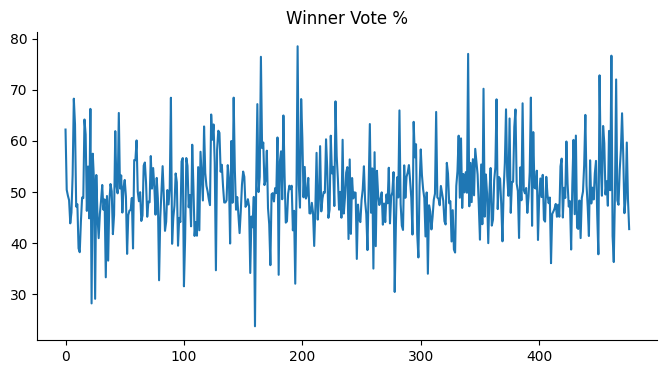

In [30]:
# @title Winner Vote %

from matplotlib import pyplot as plt
grouped_df['Winner Vote %'].plot(kind='line', figsize=(8, 4), title='Winner Vote %')
plt.gca().spines[['top', 'right']].set_visible(False)

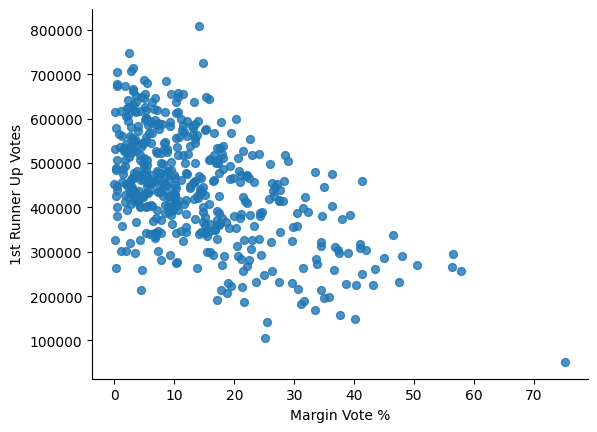

In [27]:
# @title Margin Vote % vs 1st Runner Up Votes

from matplotlib import pyplot as plt
grouped_df.plot(kind='scatter', x='Margin Vote %', y='1st Runner Up Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

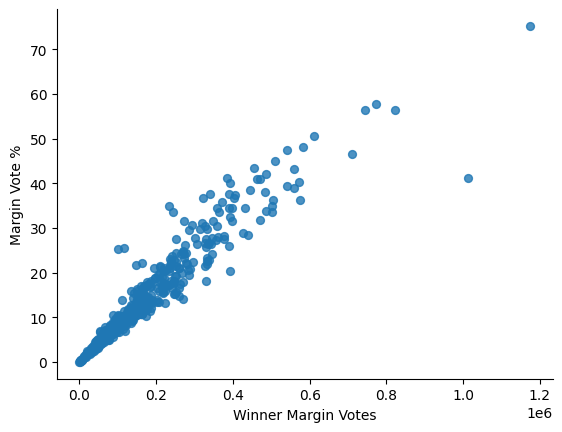

In [26]:
# @title Winner Margin Votes vs Margin Vote %

from matplotlib import pyplot as plt
grouped_df.plot(kind='scatter', x='Winner Margin Votes', y='Margin Vote %', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

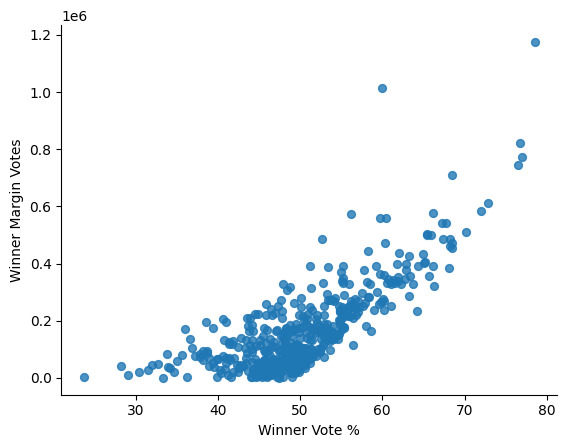

In [25]:
# @title Winner Vote % vs Winner Margin Votes

from matplotlib import pyplot as plt
grouped_df.plot(kind='scatter', x='Winner Vote %', y='Winner Margin Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

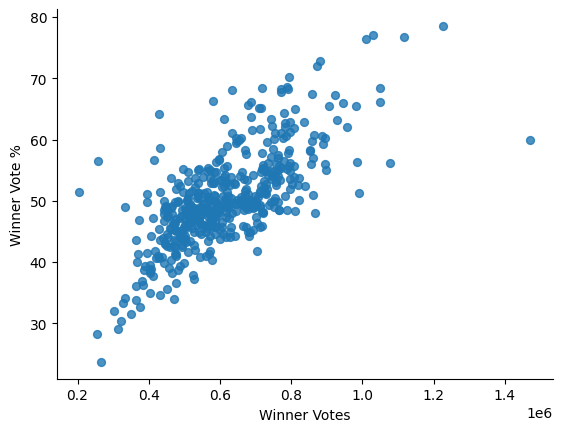

In [24]:
# @title Winner Votes vs Winner Vote %

from matplotlib import pyplot as plt
grouped_df.plot(kind='scatter', x='Winner Votes', y='Winner Vote %', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

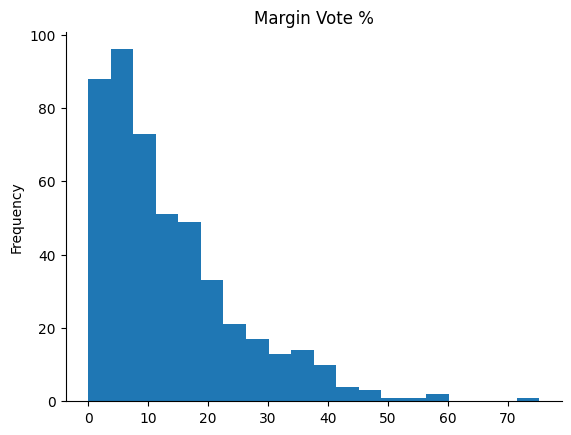

In [23]:
# @title Margin Vote %

from matplotlib import pyplot as plt
grouped_df['Margin Vote %'].plot(kind='hist', bins=20, title='Margin Vote %')
plt.gca().spines[['top', 'right',]].set_visible(False)

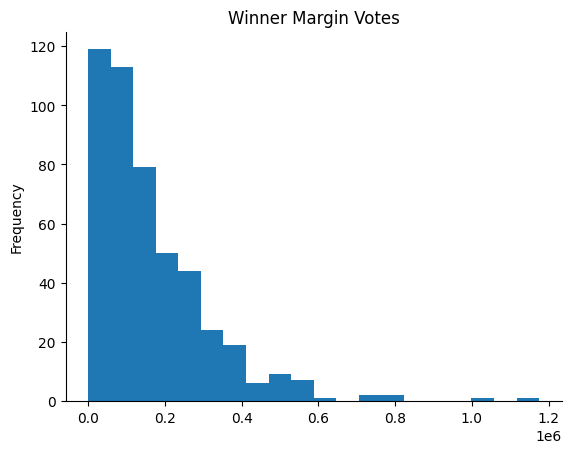

In [22]:
# @title Winner Margin Votes

from matplotlib import pyplot as plt
grouped_df['Winner Margin Votes'].plot(kind='hist', bins=20, title='Winner Margin Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

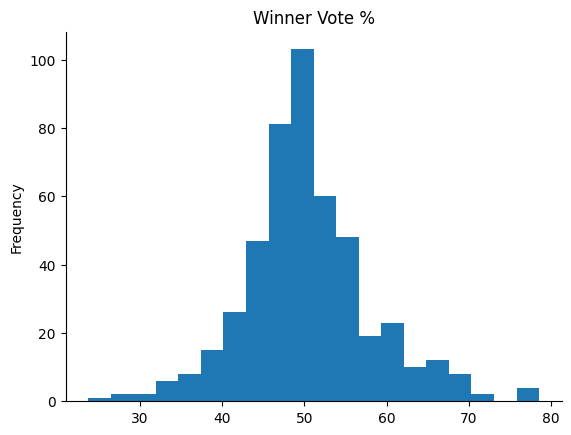

In [21]:
# @title Winner Vote %

from matplotlib import pyplot as plt
grouped_df['Winner Vote %'].plot(kind='hist', bins=20, title='Winner Vote %')
plt.gca().spines[['top', 'right',]].set_visible(False)

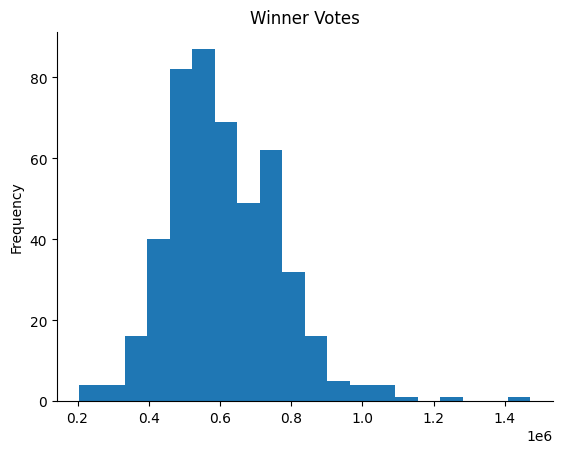

In [20]:
# @title Winner Votes

from matplotlib import pyplot as plt
grouped_df['Winner Votes'].plot(kind='hist', bins=20, title='Winner Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

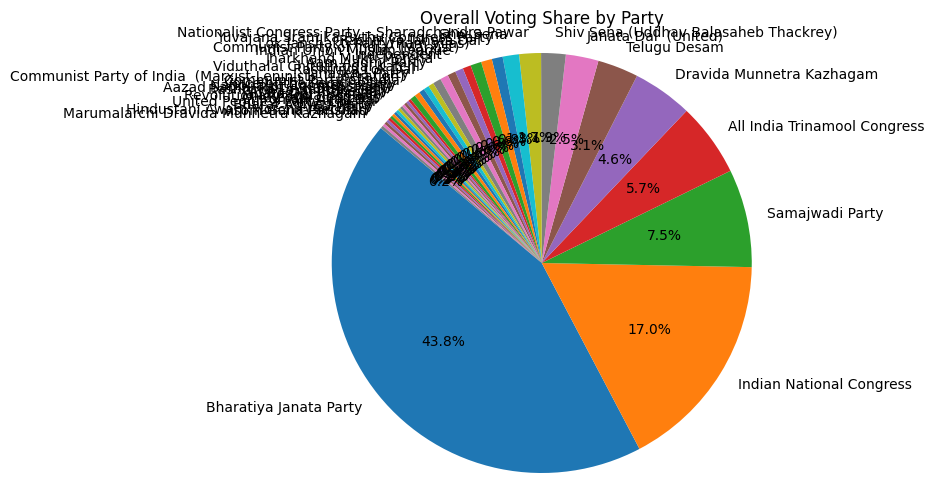

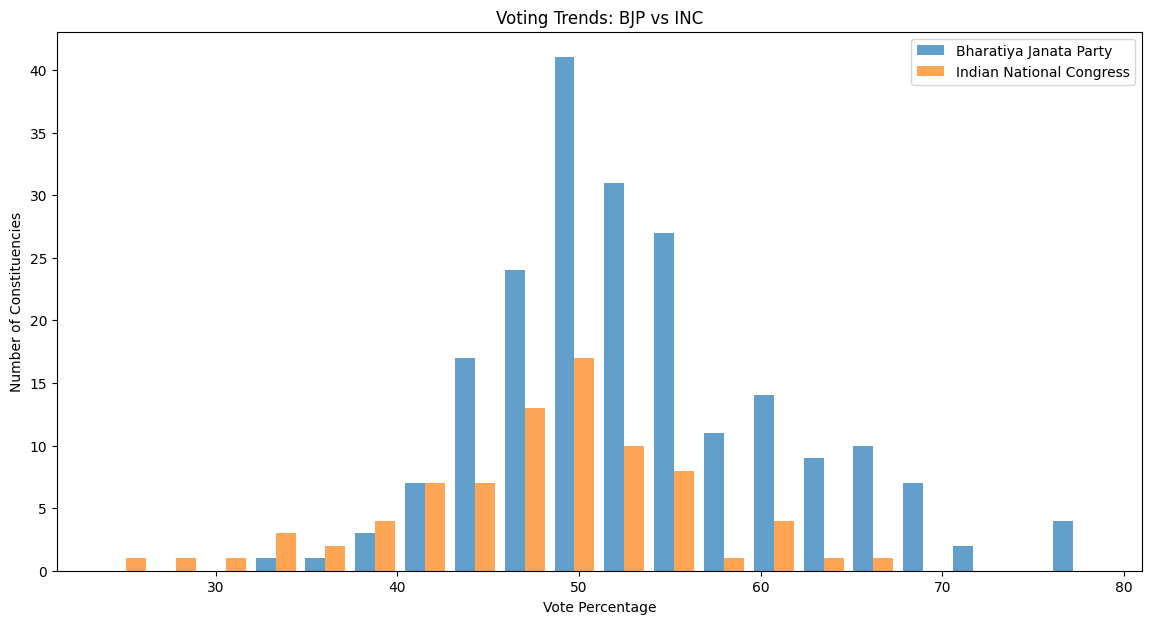

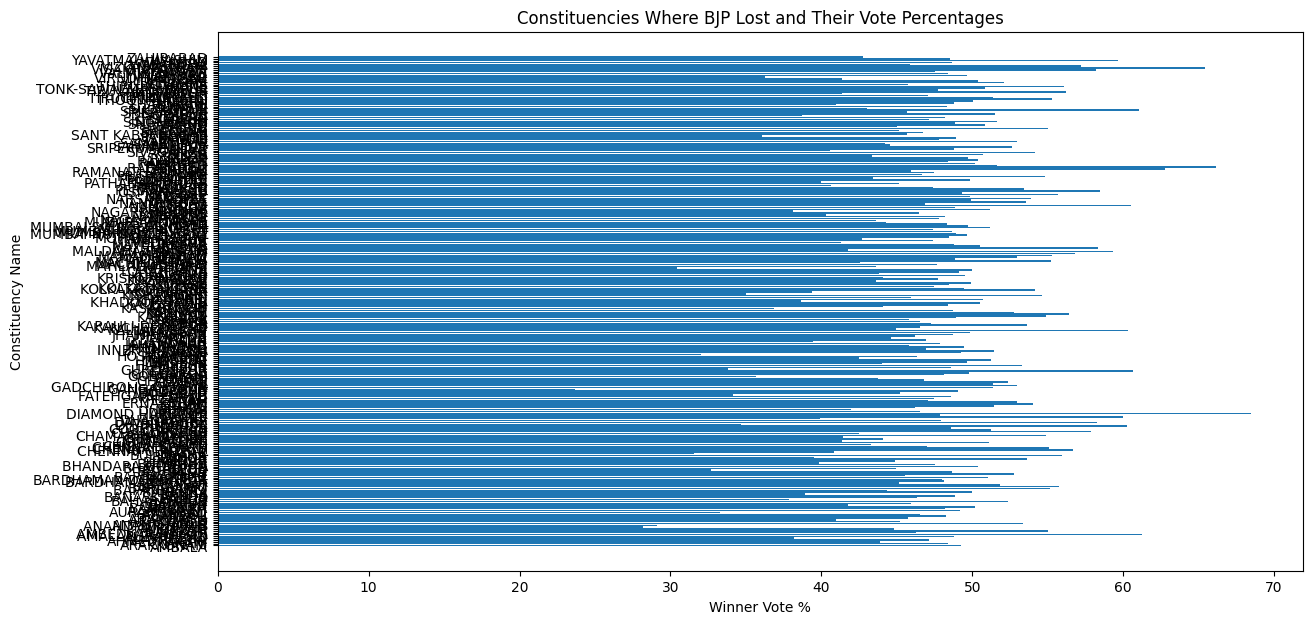

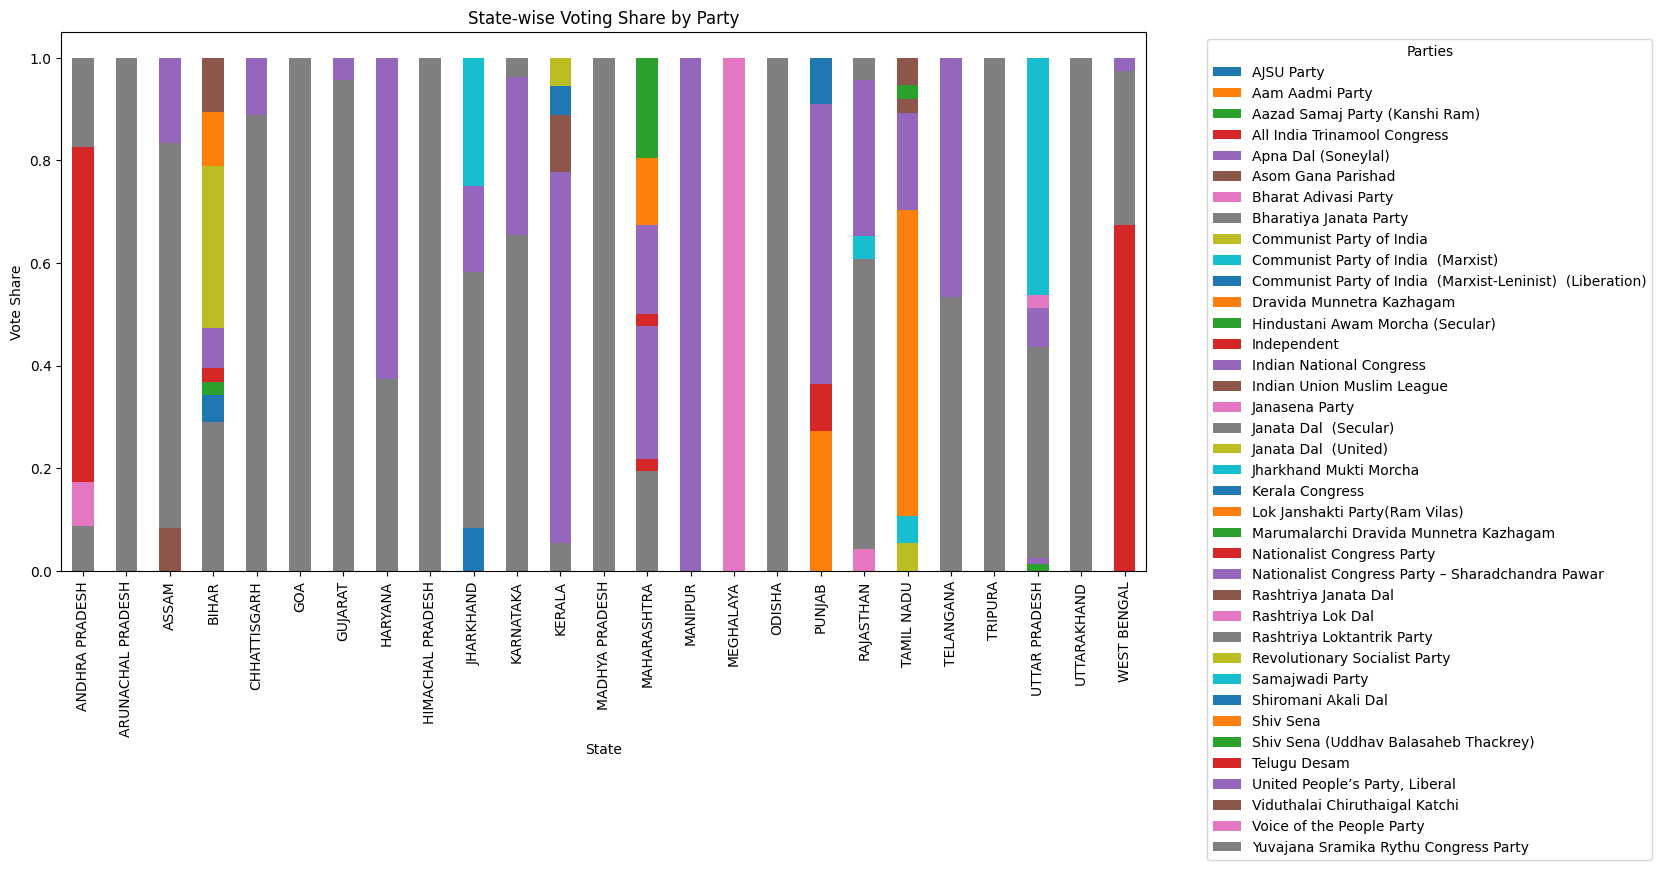

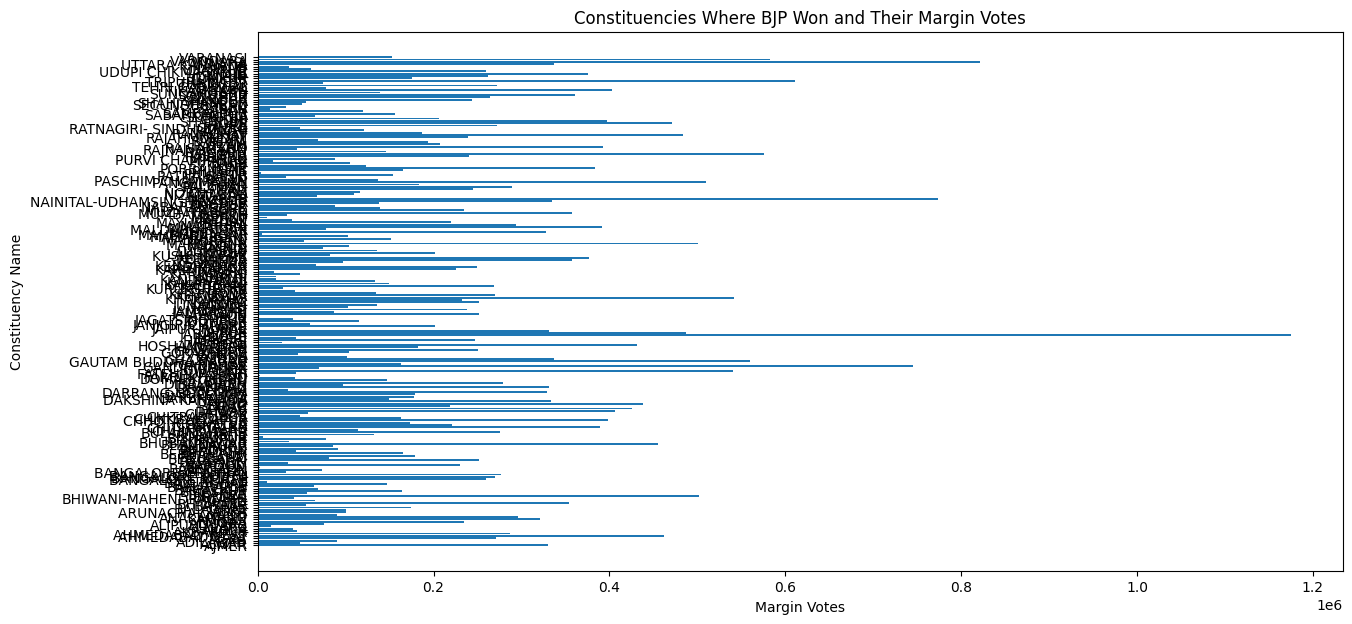

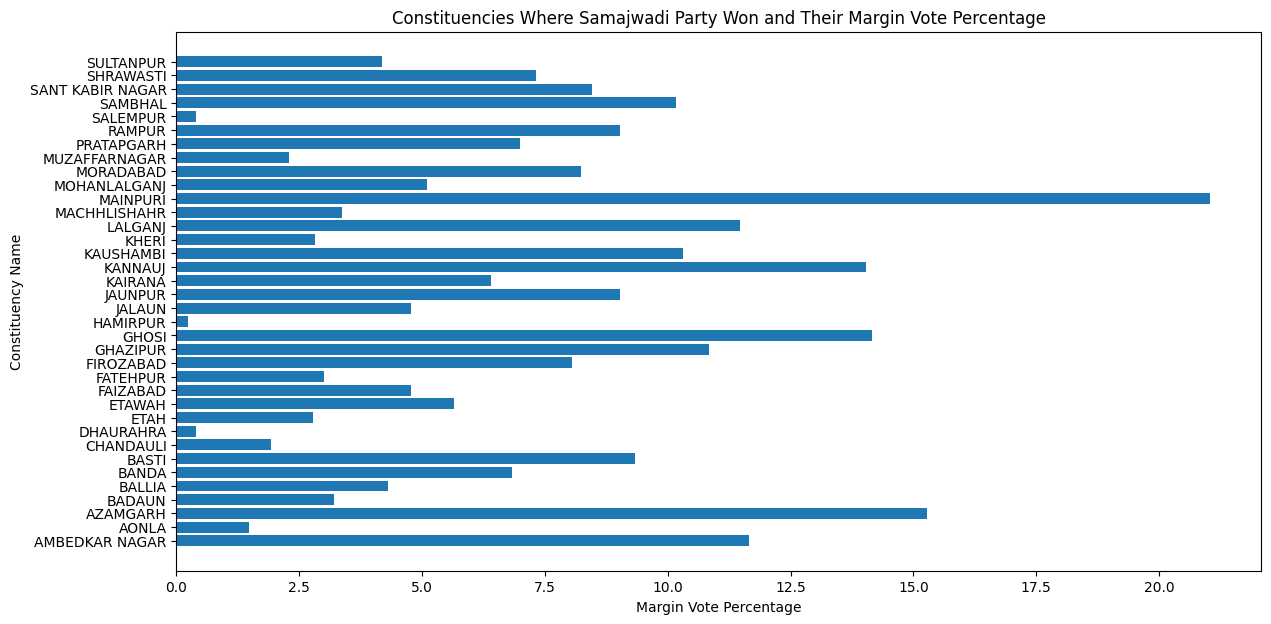

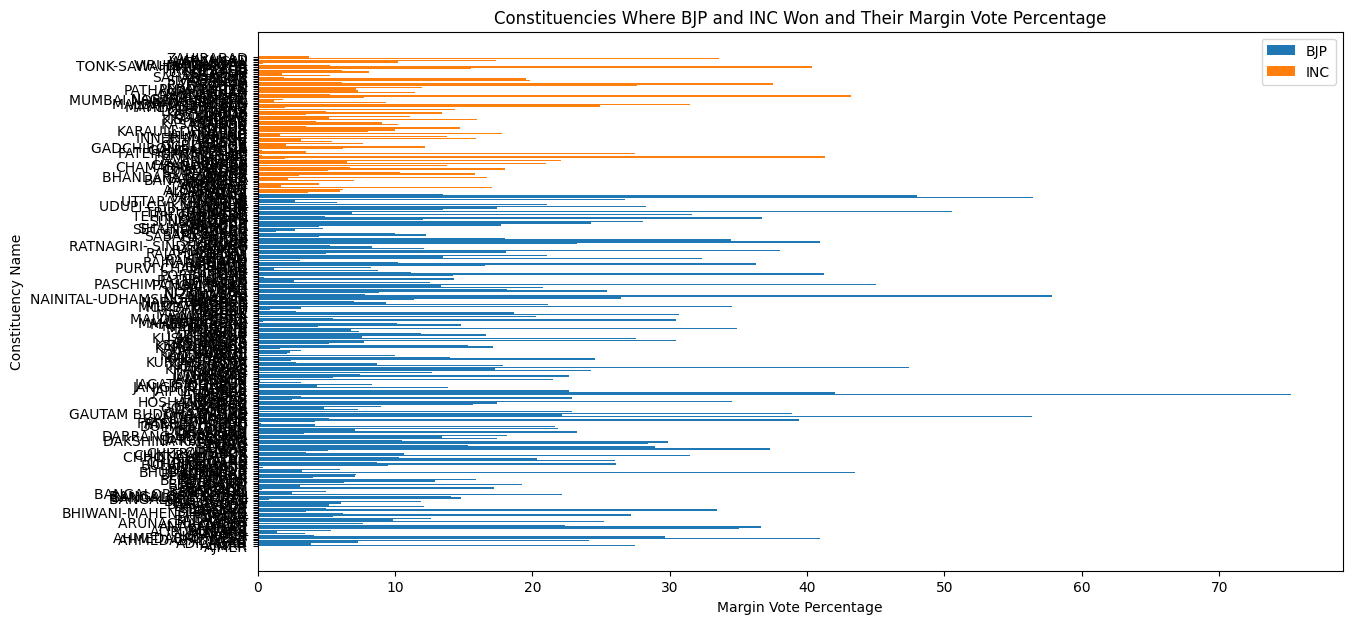

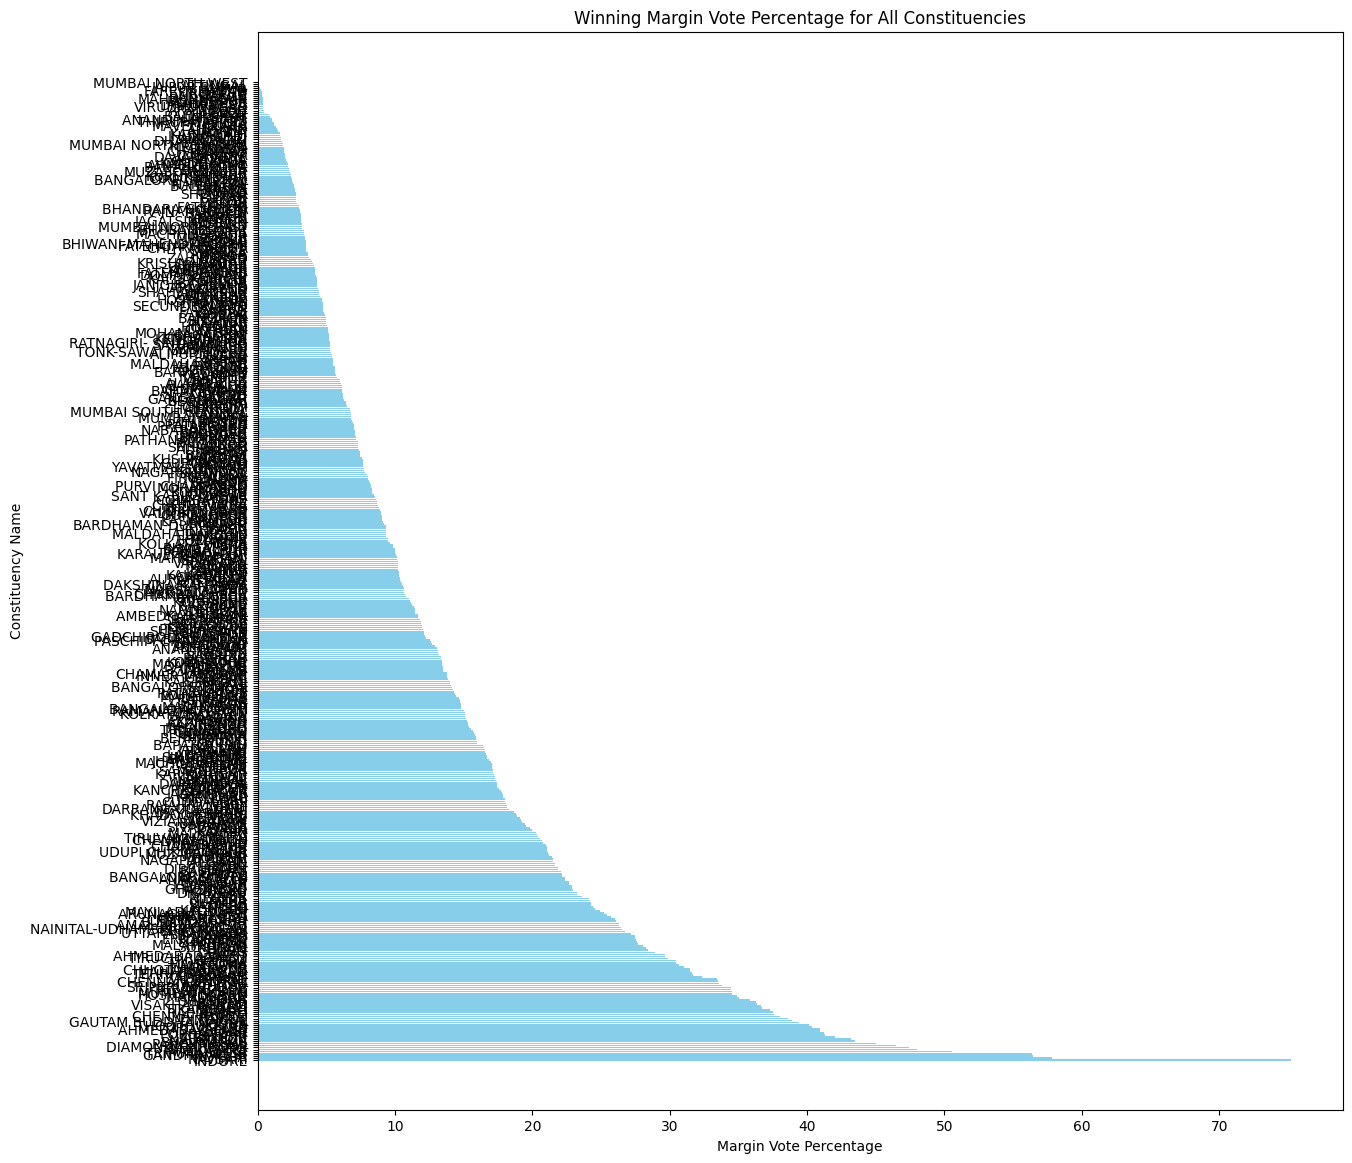

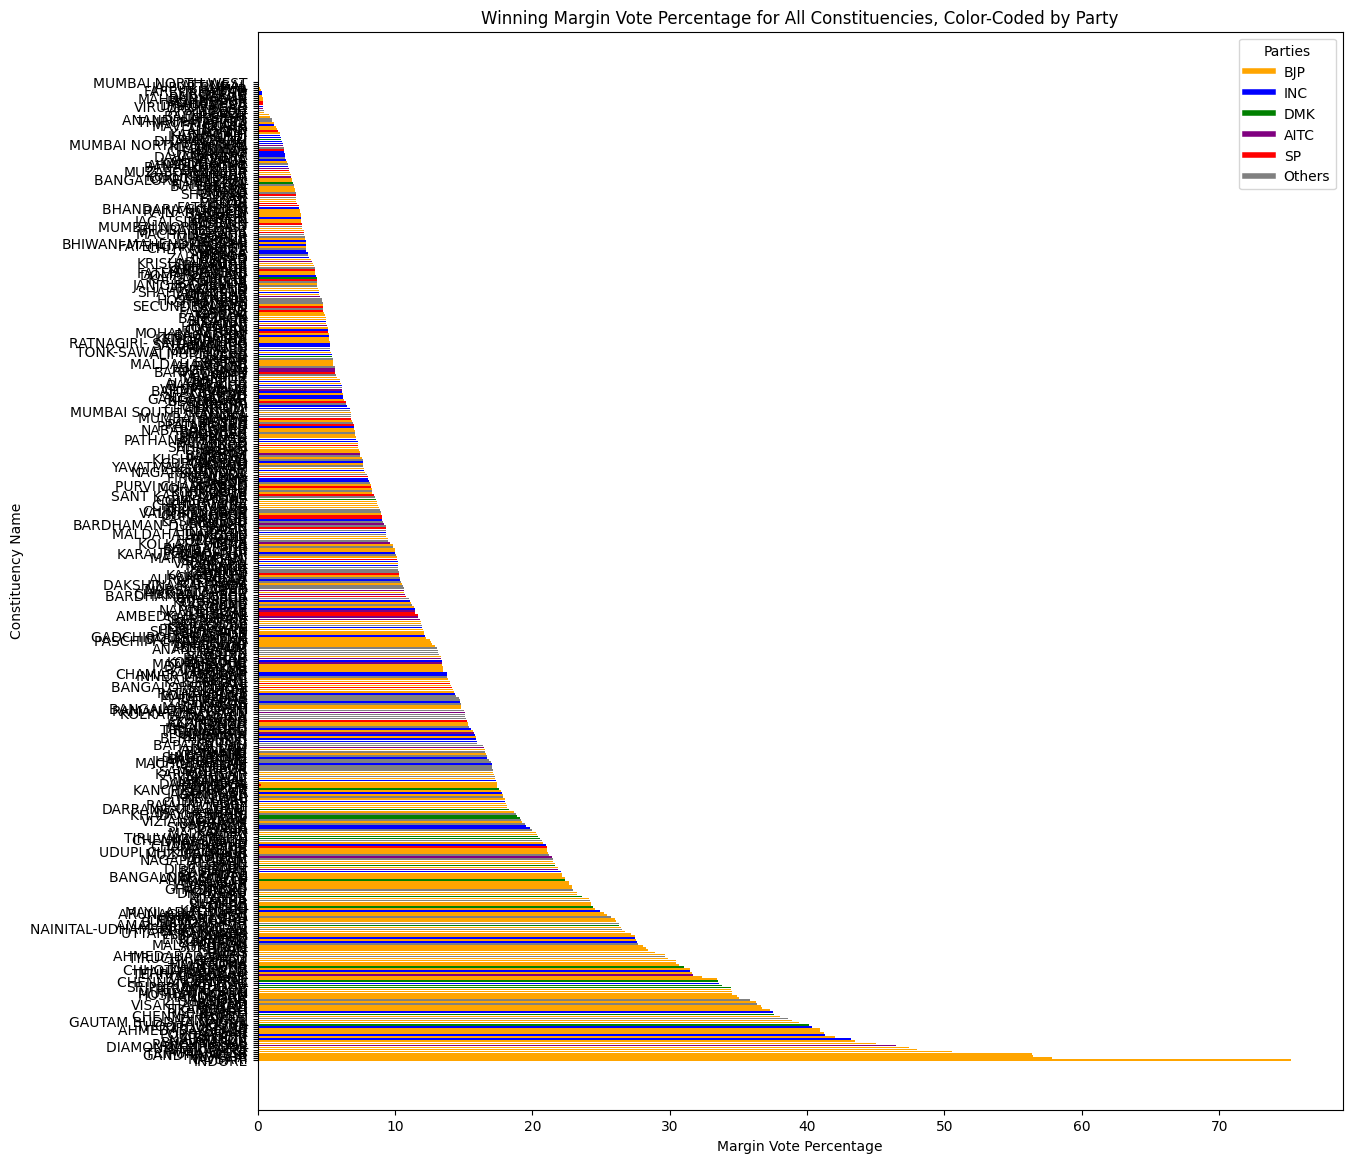

In [32]:
import matplotlib.pyplot as plt

election_data = grouped_df.copy()
# Create a function to generate pie charts for voting share
def plot_voting_share(data, title):
    parties = data['Winner'].value_counts().index
    vote_shares = data['Winner'].value_counts().values

    plt.figure(figsize=(10, 6))
    plt.pie(vote_shares, labels=parties, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Overall voting share
plot_voting_share(election_data, 'Overall Voting Share by Party')

# Voting trends between two major parties: BJP and INC
major_parties_data = election_data[election_data['Winner'].isin(['Bharatiya Janata Party', 'Indian National Congress'])]

plt.figure(figsize=(14, 7))
plt.hist([major_parties_data['Winner Vote %'][major_parties_data['Winner'] == 'Bharatiya Janata Party'],
          major_parties_data['Winner Vote %'][major_parties_data['Winner'] == 'Indian National Congress']],
         bins=20, label=['Bharatiya Janata Party', 'Indian National Congress'], alpha=0.7)
plt.xlabel('Vote Percentage')
plt.ylabel('Number of Constituencies')
plt.title('Voting Trends: BJP vs INC')
plt.legend()
plt.show()

# Analysis of constituencies where ruling party lost and correlation with development indices
# For simplicity, let's assume we have a development index column in the data
# election_data['Development Index'] = <some_calculated_values>

# Here we'll just visualize the constituencies where the ruling party lost
# Assuming 'Development Index' is a proxy for economic growth and development
lost_constituencies = election_data[election_data['Winner'] != 'Bharatiya Janata Party']

plt.figure(figsize=(14, 7))
plt.barh(lost_constituencies['Constituency Name'], lost_constituencies['Winner Vote %'])
plt.xlabel('Winner Vote %')
plt.ylabel('Constituency Name')
plt.title('Constituencies Where BJP Lost and Their Vote Percentages')
plt.show()

# State-wise voting share
statewise_data = election_data.groupby('State')['Winner'].value_counts(normalize=True).unstack().fillna(0)

statewise_data.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.xlabel('State')
plt.ylabel('Vote Share')
plt.title('State-wise Voting Share by Party')
plt.legend(title='Parties', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Filter the data for constituencies where BJP won
bjp_wins = election_data[election_data['Winner'] == 'Bharatiya Janata Party']

# Plot the constituencies where BJP won and their margin votes
plt.figure(figsize=(14, 7))
plt.barh(bjp_wins['Constituency Name'], bjp_wins['Winner Margin Votes'])
plt.xlabel('Margin Votes')
plt.ylabel('Constituency Name')
plt.title('Constituencies Where BJP Won and Their Margin Votes')
plt.show()

# Filter the data for constituencies where Samajwadi Party won
sp_wins = election_data[election_data['Winner'] == 'Samajwadi Party']

# Plot the constituencies where Samajwadi Party won and their margin vote percentage
plt.figure(figsize=(14, 7))
plt.barh(sp_wins['Constituency Name'], sp_wins['Margin Vote %'])
plt.xlabel('Margin Vote Percentage')
plt.ylabel('Constituency Name')
plt.title('Constituencies Where Samajwadi Party Won and Their Margin Vote Percentage')
plt.show()

# Filter the data for constituencies where BJP and INC won
bjp_inc_wins = election_data[election_data['Winner'].isin(['Bharatiya Janata Party', 'Indian National Congress'])]

# Separate the data for BJP and INC
bjp_wins = bjp_inc_wins[bjp_inc_wins['Winner'] == 'Bharatiya Janata Party']
inc_wins = bjp_inc_wins[bjp_inc_wins['Winner'] == 'Indian National Congress']

# Plot the constituencies where BJP and INC won and their margin vote percentage
plt.figure(figsize=(14, 7))

plt.barh(bjp_wins['Constituency Name'], bjp_wins['Margin Vote %'], label='BJP')
plt.barh(inc_wins['Constituency Name'], inc_wins['Margin Vote %'], label='INC')

plt.xlabel('Margin Vote Percentage')
plt.ylabel('Constituency Name')
plt.title('Constituencies Where BJP and INC Won and Their Margin Vote Percentage')
plt.legend()
plt.show()

# Plot the winning margin voting percentage for all constituencies
plt.figure(figsize=(14, 14))

# Sort the data by Margin Vote % for better visualization
election_data_sorted = election_data.sort_values(by='Margin Vote %', ascending=False)

plt.barh(election_data_sorted['Constituency Name'], election_data_sorted['Margin Vote %'], color='skyblue')

plt.xlabel('Margin Vote Percentage')
plt.ylabel('Constituency Name')
plt.title('Winning Margin Vote Percentage for All Constituencies')
plt.show()

# Define the top 5 winning parties
top_5_parties = election_data['Winner'].value_counts().head(5).index

# Assign colors to the top 5 parties
colors = {
    'Bharatiya Janata Party': 'orange',
    'Indian National Congress': 'blue',
    'Dravida Munnetra Kazhagam': 'green',
    'All India Trinamool Congress': 'purple',
    'Samajwadi Party': 'red'
}

# Apply color coding
election_data_sorted['Color'] = election_data_sorted['Winner'].map(colors).fillna('grey')

# Plot the winning margin voting percentage for all constituencies with color coding for the top 5 parties
plt.figure(figsize=(14, 14))

plt.barh(election_data_sorted['Constituency Name'], election_data_sorted['Margin Vote %'], color=election_data_sorted['Color'])

plt.xlabel('Margin Vote Percentage')
plt.ylabel('Constituency Name')
plt.title('Winning Margin Vote Percentage for All Constituencies, Color-Coded by Party')

# Create a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='orange', lw=4, label='BJP'),
                   Line2D([0], [0], color='blue', lw=4, label='INC'),
                   Line2D([0], [0], color='green', lw=4, label='DMK'),
                   Line2D([0], [0], color='purple', lw=4, label='AITC'),
                   Line2D([0], [0], color='red', lw=4, label='SP'),
                   Line2D([0], [0], color='grey', lw=4, label='Others')]

plt.legend(handles=legend_elements, title='Parties')

plt.show()
